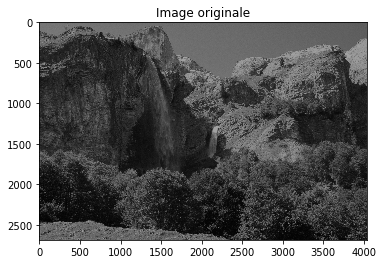

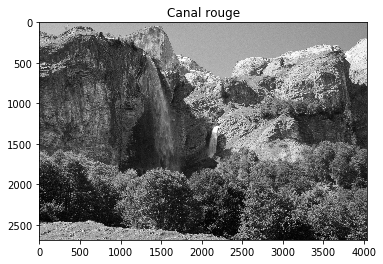

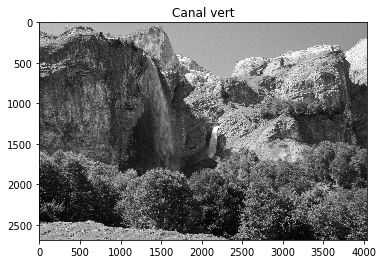

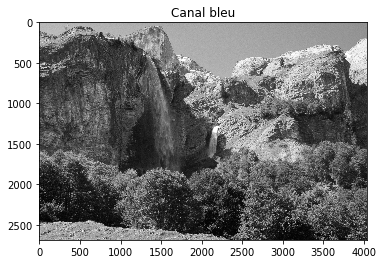

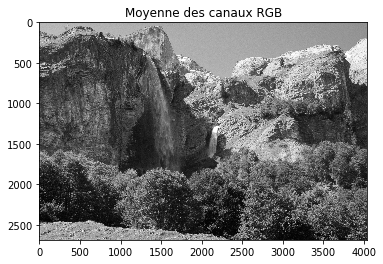

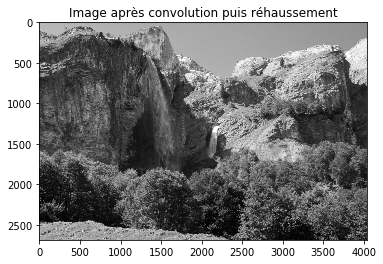

In [60]:
## CHARGEMENT DES MODULES PYTHON
%matplotlib inline
import imageio
import matplotlib.pyplot as plt
import numpy as np
import scipy.ndimage as ndi
import scipy.signal as signal
import skimage
import skimage.exposure as expo
import matplotlib.patches as mpatches
from skimage import data
from skimage import filters
from skimage import morphology
from skimage import color
from skimage.filters import threshold_otsu
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
from skimage.morphology import closing, square
from skimage.measure import label, regionprops
from skimage.color import label2rgb

## CHARGEMENT D'UNE IMAGE COULEUR 3 CANAUX 8 BITS
## (CREATION D'UN TABLEAU DE VALEURS (VALEURS = NIVEAUX DE GRIS))
# Choisir une des trois lignes suivantes
#I = imageio.imread("retine.png")
I = skimage.io.imread('boret2.jpg')
#I = data.astronaut()
# D'autres images disponibles sur
# https://scikit-image.org/docs/dev/api/skimage.data.html
# ou dans https://github.com/srivol/visionindus

## AFFICHAGE DE L'IMAGE
plt.imshow(I, cmap=plt.cm.gray)
plt.title('Image originale')
plt.show()

## CHANGEMENT DE TYPE DE L'IMAGE AVANT DE FAIRE DES OPERATIONS
I=I.astype(np.float)

## SI I = IMAGE A NIVEAUX DE GRIS
#Indg=I

## SI I = IMAGE COULEUR
## CONSTRUCTION ET AFFICHAGE DES 3 CANAUX DE COULEURS
Irouge=I[:,:,0]
plt.imshow(Irouge, cmap=plt.cm.gray)
plt.title('Canal rouge')
plt.show()
Ivert=I[:,:,1]
plt.imshow(Ivert, cmap=plt.cm.gray)
plt.title('Canal vert')
plt.show()
Ibleu=I[:,:,2]
plt.imshow(Ibleu, cmap=plt.cm.gray)
plt.title('Canal bleu')
plt.show()
## CONSTRUCTION ET AFFICHAGE IMAGE NIVEAUX DE GRIS COMME MOYENNE DES TROIS CANAUX
# On n'est pas obligé de mettre les coefficients 1/3 à chaque canal.
#On peut mettre d'autres coefficients, tant que la somme des coefficients est égale à 1.
Indg=(Irouge+Ivert+Ibleu)/3
    
## CHANGEMENT DE TYPE DE L'IMAGE AVANT AFFICHAGE
Indg=Indg.astype(np.uint8)

## AFFICHAGE DE L'IMAGE NIVEAUX DE GRIS
plt.imshow(Indg, cmap=plt.cm.gray)
plt.title('Moyenne des canaux RGB')
plt.show()

## CHANGEMENT DE TYPE DE L'IMAGE AVANT DE FAIRE DES OPERATIONS
Indg=Indg.astype(np.float)

## OPERATION DE CONVOLUTION AVEC MASQUE g
# Choisir une des neuf lignes suivantes ou ...
#g=np.array([[1,1,1], [1,1,1], [1,1,1]]) # pour un filtre moyen 3x3
#g=np.array([[1,1,1,1,1], [1,1,1,1,1], [1,1,1,1,1], [1,1,1,1,1], [1,1,1,1,1]]) # pour un filtre moyen 5x5
#g=np.array([[1,2,1], [2,4,2], [1,2,1]]) # pour un filtre gaussien 3x3
g=np.array([[1,4,7,4,1], [4,20,33,20,4], [7,33,55,33,7], [4,20,33,20,4], [1,4,7,4,1]]) # pour un filtre gaussien 5x5
#g=np.array([[0,-1,0], [-1,4,-1], [0,-1,0]]) # pour un filtre laplacien 3x3
#g=np.array([[0,0,0], [-1,1,0], [0,0,0]])
#g=np.array([[0,-1,0], [0,1,0], [0,0,0]])
#g=np.array([[-2,-1,0], [-1,1,1], [0,1,2]])
#g=np.array([[0,-1,0], [-1,5,-1], [0,-1,0]])
# ... à vous d'en inventer d'autres ...
Iconvol=signal.convolve2d(Indg, g, 'same')
# ... ou au lieu d'utiliser un masque et la fonction signal.convolve2d,
# vous pouvez utiliser un filtre existant dans un module python.
# Par exemple, Iconvol=filters.gaussian(Indg,sigma=3)
# voir liste des filtres dans https://scikit-image.org/docs/dev/api/skimage.filters.html
# Autre exemple, Iconvol=ndi.uniform_filter(Indg,size=5)
# voir liste des filtres dans https://docs.scipy.org/doc/scipy/reference/ndimage.html

## REMETTRE LES NIVEAUX DE GRIS DE L'IMAGE OBTENUE ENTRE 0 ET 255 (INTERPOLATION LINEAIRE)
Iconvol0255=255*(Iconvol-np.min(Iconvol))/(np.max(Iconvol)-np.min(Iconvol))

## CHANGEMENT DE TYPE DE L'IMAGE AVANT AFFICHAGE
Iconvol0255=Iconvol0255.astype(np.uint8)

## AFFICHAGE DU RESULTAT
plt.imshow(Iconvol0255, cmap=plt.cm.gray)
plt.title('Image après convolution puis réhaussement')
plt.show()